<a href="https://colab.research.google.com/github/khan-habibullah/ml1/blob/master/Implementation_of_CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_x, train_y),(test_x, test_y) = mnist.load_data()
print(train_x.shape, train_y.shape ,test_x.shape,test_y.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [5]:
train_x[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [6]:
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [7]:
train_x.shape, type(train_x), train_x.dtype

((60000, 28, 28, 1), numpy.ndarray, dtype('uint8'))

In [8]:
train_y.shape

(60000, 10)

In [9]:
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0

In [10]:
train_x.shape, type(train_x), train_x.dtype

((60000, 28, 28, 1), numpy.ndarray, dtype('float32'))

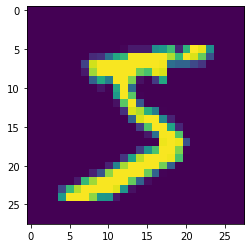

In [11]:
plt.imshow(train_x[0])

In [12]:
train_x[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [13]:
train_x.shape[:2]

(60000, 28)

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same',activation = 'LeakyReLU', kernel_initializer='he_uniform', input_shape= (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), padding= 'same', activation = 'LeakyReLU', kernel_initializer='he_uniform'))
model.add(Conv2D(64,3, activation = 'LeakyReLU', padding = 'same', kernel_initializer= 'he_uniform'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation = 'LeakyReLU'))
model.add(Dense(50, activation = 'LeakyReLU'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [15]:
model.compile(optimizer='rmsprop',loss= 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_x, train_y, batch_size= 128, validation_data=(test_x, test_y), epochs= 15)

Epoch 1/15
469/469 [==============================] - 18s 9ms/step - loss: 0.1601 - accuracy: 0.9524 - val_loss: 0.0469 - val_accuracy: 0.9850
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0465 - val_accuracy: 0.9843
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0429 - val_accuracy: 0.9863
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0214 - accuracy: 0.9927 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0351 - val_accuracy: 0.9901
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0297 - val_accuracy: 0.9929
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0325 - val_accuracy: 0.9927
Epoch

In [17]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0456 - accuracy: 0.9914


[0.045629244297742844, 0.9914000034332275]

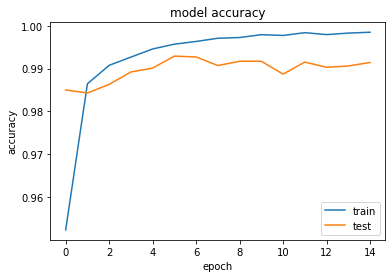

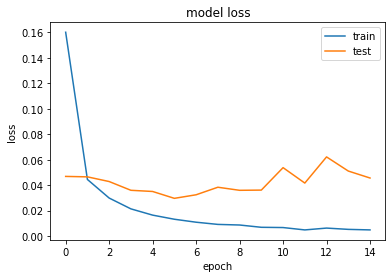

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

(207, 217, 3)
(1, 28, 28, 1)


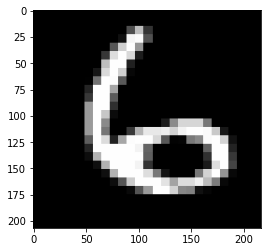

In [22]:
from keras.utils import load_img
import cv2
# image = load_img('')
image = cv2.imread('/content/6.PNG')
plt.imshow(image)
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(gray,(28,28))
image = image.reshape(-1,28,28,1).astype('float32')/255.0
print(image.shape)

In [23]:
pred= model.predict(image)
label = np.argmax(pred)
print(label)

1/1 [==============================] - 0s 20ms/step
6


In [24]:
import pickle

In [26]:
pickle.dump(model,open('regmodel.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........activation
............vars
.........vars
............0
............1
......conv2d_1
.........activation
............vars
.........vars
............0
............1
......conv2d_2
.........activation
............vars
.........vars
............0
............1
......dense
.........activation
............vars
.........vars
............0
............1
......dense_1
.........activation
............vars
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...v

In [27]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-22 05:38:26         4683
variables.h5                                   2023-03-22 05:38:26      3046488
metadata.json                                  2023-03-22 05:38:26           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........activation
............vars
.........vars
............0
............1
......conv2d_1
.........activation
............vars
.........vars
............0
............1
......conv2d_2
.........activation
............vars
.........vars
............0
............1
......dense
.........activation
............vars
.........vars
............0
............1
......dense_1
.........activation
............vars
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.......

In [28]:
pred= pickled_model.predict(image)
label = np.argmax(pred)
print(label)

1/1 [==============================] - 0s 165ms/step
6
